In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos
url = "https://raw.githubusercontent.com/Alex270198/RuthQuito_AlexanderZambrano/main/heart.csv"
data = pd.read_csv(url)

In [5]:
# Mostrar las primeras filas del conjunto de datos
print(data.head())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


In [8]:
# Seleccionar las características relevantes para el clustering (puedes ajustar estas características según tus necesidades)
X = data[['age', 'trtbps']]

In [9]:
# Normalizar los datos para que tengan media cero y varianza unitaria
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Aplicar el algoritmo K-means
kmeans = KMeans(n_clusters=3, random_state=42)  # Puedes ajustar el número de clusters según sea necesario
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [11]:
# Obtener las etiquetas de los clusters y agregarlas al conjunto de datos
data['cluster'] = kmeans.labels_

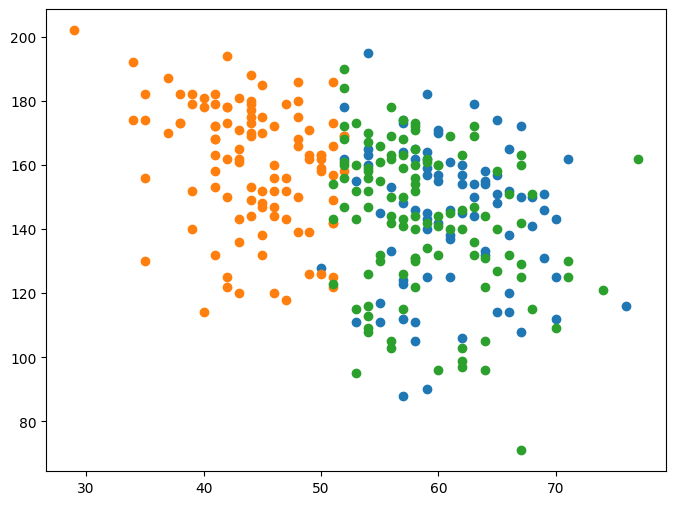

In [12]:
# Graficar los clusters
plt.figure(figsize=(8, 6))
for cluster in data['cluster'].unique():
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data['age'], cluster_data['thalachh'], label=f'Cluster {cluster}')

In [ ]:
# Graficar los centroides de los clusters
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black', label='Centroides')
plt.xlabel('Edad')
plt.ylabel('Frecuencia Cardíaca Máxima')
plt.title('Clustering con K-means')
plt.legend()
plt.show()

In [14]:
# Mostrar los indicadores de los clusters
cluster_counts = data['cluster'].value_counts()
print("Número de muestras por cluster:")
print(cluster_counts)

cluster_means = data.groupby('cluster').mean()
print("\nMedia de las características por cluster:")
print(cluster_means)

Número de muestras por cluster:
0    113
1    106
2     84
Name: cluster, dtype: int64

Media de las características por cluster:
               age       sex        cp      trtbps        chol       fbs  \
cluster                                                                    
0        58.876106  0.707965  0.787611  121.964602  253.371681  0.159292   
1        44.226415  0.698113  1.113208  125.386792  234.745283  0.066038   
2        61.095238  0.630952  1.023810  152.488095  251.238095  0.238095   

          restecg    thalachh      exng   oldpeak       slp       caa  \
cluster                                                                 
0        0.522124  143.150442  0.389381  1.046018  1.353982  0.929204   
1        0.594340  160.433962  0.245283  0.707547  1.547170  0.433962   
2        0.452381  144.773810  0.345238  1.450000  1.273810  0.833333   

            thall    output  
cluster                      
0        2.345133  0.477876  
1        2.235849  0.707547  
2  